In [126]:
import pandas as pd 
import numpy as np 
df = pd.read_csv('churn_clean.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [127]:
from scipy.stats import chi2_contingency

In [128]:
#Create contingency table for Techie and Churn

In [129]:
contingency_table = pd.crosstab(df['Techie'], df['Churn'])

In [130]:
#Print contingency table

In [131]:
print("Contingency Table:")
print(contingency_table)

Contingency Table:
Churn     No   Yes
Techie            
No      6226  2095
Yes     1124   555


In [132]:
#perform chi-square test

In [133]:
chi2, p, _, expected = chi2_contingency(contingency_table)

In [134]:
#Print results

In [135]:
print("\nChi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1))
print("Expected frequencies table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))


Chi-square statistic: 44.11479393861451
P-value: 3.096716355509661e-11
Degrees of freedom: 1
Expected frequencies table:
Churn         No       Yes
Techie                    
No      6115.935  2205.065
Yes     1234.065   444.935


In [136]:
#Check the p-value to determine statistical significance

In [137]:
alpha = 0.05
if p < alpha:
    print("\nThe result is statistically significant; reject the null hypothesis.")
else:
    print("\nThe result is not statistically significant; fail to reject the null hypothesis.")


The result is statistically significant; reject the null hypothesis.


In [138]:
#import library matplotlib

In [139]:
import matplotlib.pyplot as plt

In [140]:
# Part C: Yearly_equip_failure distriubution (continuous variable no.1)

(array([6.727e+03, 2.670e+03, 0.000e+00, 5.090e+02, 0.000e+00, 8.600e+01,
        7.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

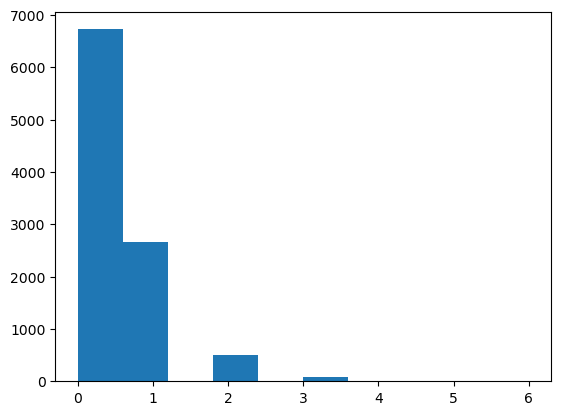

In [141]:
 plt.hist(df["Yearly_equip_failure"])

In [142]:
#as can be seen, there is a right skew distribution.

In [143]:
#Outage_sec_per week (continuous variable no.2)

(array([  42.,  245.,  876., 1919., 2804., 2357., 1240.,  413.,   94.,
          10.]),
 array([ 0.09974694,  2.21049525,  4.32124355,  6.43199186,  8.54274016,
        10.65348847, 12.76423678, 14.87498508, 16.98573339, 19.09648169,
        21.20723   ]),
 <BarContainer object of 10 artists>)

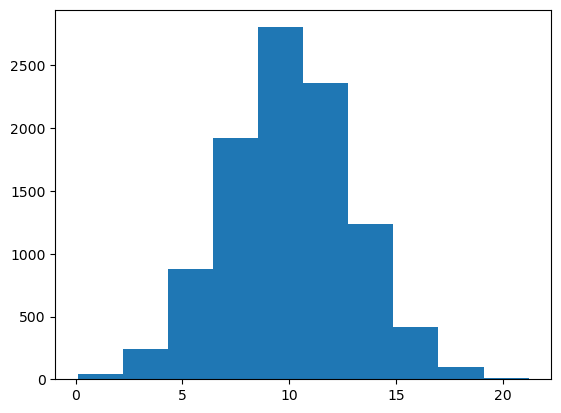

In [144]:
 plt.hist(df["Outage_sec_perweek"])

In [145]:
#as can be seen, Outage_sec_perweek has a normal distribution

In [146]:
#Techie (categorical variable no.1)

In [147]:
binary_variable_counts = df['Techie'].value_counts()

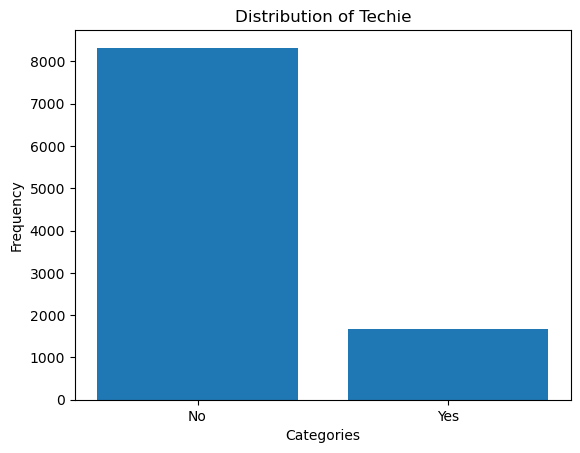

In [148]:
plt.bar(binary_variable_counts.index, binary_variable_counts.values)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Distribution of Techie')
plt.show()

In [149]:
#as shown, Techie has a right skewed distribution. 

In [150]:
#Churn (categorical variable no.2)

In [151]:
binary_variable_counts = df['Churn'].value_counts()

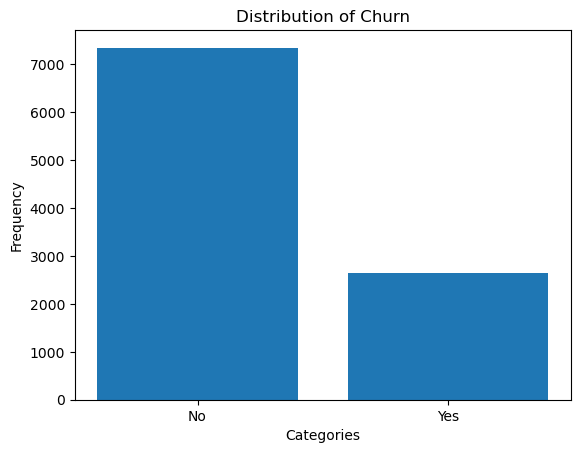

In [152]:
plt.bar(binary_variable_counts.index, binary_variable_counts.values)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Distribution of Churn')
plt.show()

In [153]:
#as can be seen, Churn has a right skewed distribution

In [154]:
import seaborn as sns

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
#D. Find distribution of continous bivariate variables

In [157]:
#Assign axis for both continous variables

In [158]:
X = df['Yearly_equip_failure'].values.reshape(-1, 1)
y = df['Income'].values

In [159]:
#Create and fit linear regression model

In [160]:
model = LinearRegression().fit(X, y)


In [161]:
#Find slope and intercept

In [162]:
slope = model.coef_[0]
intercept = model.intercept_

In [163]:
#plot the line 

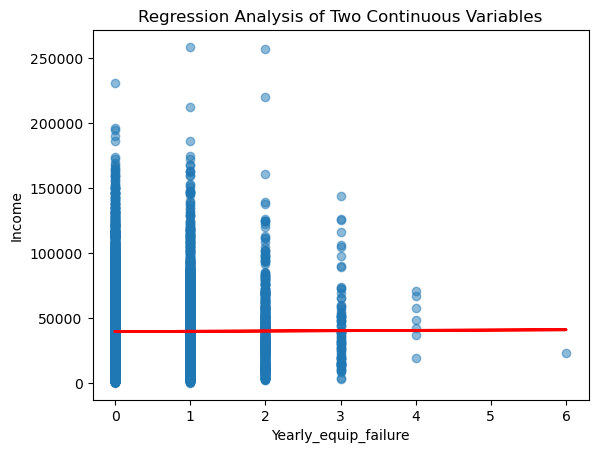

In [164]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X, slope * X + intercept, color='red', linewidth=2)
plt.xlabel('Yearly_equip_failure')
plt.ylabel('Income')
plt.title('Regression Analysis of Two Continuous Variables')
plt.show()

In [165]:
#the linear regression model shows a skewed right distribution for the variables 'Income' and 'Yearly_equip_failure'

In [166]:
#bivariate distribution for categorigal variables

In [167]:
data = {'Item1': ['1', '2', '3', '4', '5'],
        'Item2': ['1', '2', '3', '4', '5']}
df = pd.DataFrame(data)

In [168]:
#create contingency table 

In [169]:
contingency_table = pd.crosstab(df['Item1'], df['Item2'])


In [170]:
#Create heat map 

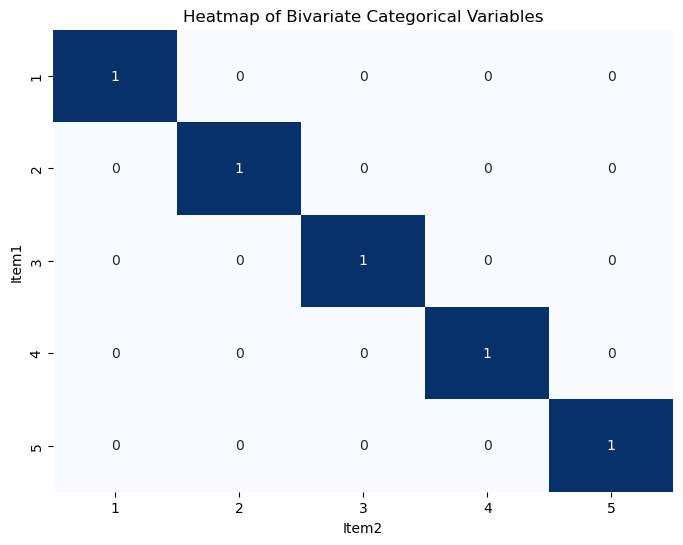

In [171]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Heatmap of Bivariate Categorical Variables')
plt.xlabel('Item2')
plt.ylabel('Item1')
plt.show()

In [ ]:
#As can be seen Item1 and Item2 show a right skew distribution 